In [4]:
import pandas as pd

mice_eeg_1 = pd.read_csv('pw3_data/EEG_mouse_data_1.csv')
mice_eeg_1

mice_egg_2 = pd.read_csv('pw3_data/EEG_mouse_data_2.csv')
mice_egg_2

mice_eeg_total = pd.concat([mice_eeg_1, mice_egg_2])

In [5]:
data_train = mice_eeg_total.iloc[:, :26]
data_train

,state,amplitude_around_1_Hertz,amplitude_around_2_Hertz,amplitude_around_3_Hertz,amplitude_around_4_Hertz,amplitude_around_5_Hertz,amplitude_around_6_Hertz,amplitude_around_7_Hertz,amplitude_around_8_Hertz,amplitude_around_9_Hertz,...,amplitude_around_16_Hertz,amplitude_around_17_Hertz,amplitude_around_18_Hertz,amplitude_around_19_Hertz,amplitude_around_20_Hertz,amplitude_around_21_Hertz,amplitude_around_22_Hertz,amplitude_around_23_Hertz,amplitude_around_24_Hertz,amplitude_around_25_Hertz
0,n,0.000009,0.000014,0.000013,0.000014,0.000023,0.000009,0.000019,0.000011,0.000016,...,1.121431e-06,9.572615e-07,7.912338e-07,2.075210e-06,2.125421e-06,9.183682e-07,1.442768e-06,1.315617e-06,1.882535e-06,3.555321e-07
1,n,0.000010,0.000010,0.000011,0.000015,0.000022,0.000017,0.000027,0.000011,0.000011,...,1.214325e-06,2.456797e-06,2.102875e-06,3.754975e-07,1.144381e-06,1.869306e-06,9.546215e-07,8.958666e-07,2.865039e-07,8.280935e-07
2,n,0.000011,0.000077,0.000034,0.000019,0.000013,0.000006,0.000010,0.000004,0.000006,...,2.251707e-06,3.322518e-06,1.112426e-06,8.238182e-07,8.392117e-07,6.979253e-07,4.631708e-07,3.179654e-07,3.833318e-07,2.466324e-07
3,w,0.000003,0.000031,0.000044,0.000016,0.000007,0.000006,0.000005,0.000007,0.000006,...,2.197342e-06,8.276670e-07,6.019235e-07,3.639088e-07,3.230235e-07,4.536860e-07,5.793950e-07,2.854656e-07,9.187695e-07,5.579241e-07
4,w,0.000010,0.000011,0.000012,0.000017,0.000020,0.000018,0.000014,0.000025,0.000018,...,3.330912e-06,3.003597e-06,3.560957e-06,1.856221e-06,8.180798e-07,1.657310e-06,2.038410e-06,9.678699e-07,6.374025e-07,8.643028e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20600,w,0.000025,0.000007,0.000007,0.000003,0.000005,0.000002,0.000005,0.000010,0.000013,...,7.605994e-07,5.857975e-07,2.008976e-06,1.047500e-06,8.361965e-07,1.187530e-06,1.362517e-06,1.155722e-06,4.674335e-07,4.710592e-07
20601,w,0.000017,0.000038,0.000015,0.000011,0.000019,0.000006,0.000010,0.000012,0.000009,...,4.660933e-07,4.797065e-07,1.377159e-06,1.549855e-06,2.014634e-06,1.006481e-06,1.255027e-06,7.684788e-07,1.131635e-06,1.080890e-06
20602,w,0.000016,0.000028,0.000031,0.000011,0.000019,0.000001,0.000015,0.000002,0.000007,...,9.727383e-07,5.698932e-07,8.794702e-07,9.412227e-07,7.479130e-07,1.173636e-07,8.319340e-07,1.222192e-07,1.277335e-07,2.256663e-07
20603,w,0.000013,0.000014,0.000020,0.000018,0.000007,0.000013,0.000009,0.000018,0.000005,...,7.172008e-07,1.828871e-06,5.327440e-07,5.149679e-07,6.310218e-07,4.164332e-07,3.309523e-07,8.170078e-07,6.630207e-07,9.615590e-07


In [6]:
data_train["state"][data_train["state"] == "w"] = -1
data_train["state"][data_train["state"] != -1] = 1

#data_train["state"].remplace('w', -1)

/tmp/ipykernel_63091/1154354999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["state"][data_train["state"] == "w"] = -1
/tmp/ipykernel_63091/1154354999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["state"][data_train["state"] != -1] = 1


In [7]:
data_train["state"]

0         1
1         1
2         1
3        -1
4        -1
         ..
20600    -1
20601    -1
20602    -1
20603    -1
20604    -1
Name: state, Length: 40863, dtype: object

In [8]:
# %pip install keras
# %pip install tensorflow

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as pl
from sklearn.preprocessing import StandardScaler
import keras
from keras import layers
from sklearn.model_selection import KFold
def create_model():
  # 2 inputs
  # 2 hidden nodes
  # 1 output

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(8, activation="tanh"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(1, activation="tanh"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),  #0.01
      loss="mse",
  )

  return mlp

mlp = create_model()
mlp.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4754 - val_loss: 0.4273
Epoch 2/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4057 - val_loss: 0.3785
Epoch 3/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3833 - val_loss: 0.3835
Epoch 4/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3796 - val_loss: 0.4143
Epoch 5/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3839 - val_loss: 0.3688
Epoch 6/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3824 - val_loss: 0.3701
Epoch 7/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3783 - val_loss: 0.4019
Epoch 8/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3884 - val_loss: 0.3618
Epoch 9/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3639 - val_loss: 0.4052
Epoch 10/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3732 - val_loss: 0.4200
Epoch 11/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3756 - val_loss: 0.3611
Epoch 12/100
852/852 ━━━━━━━━━━━━━━━━━━━━

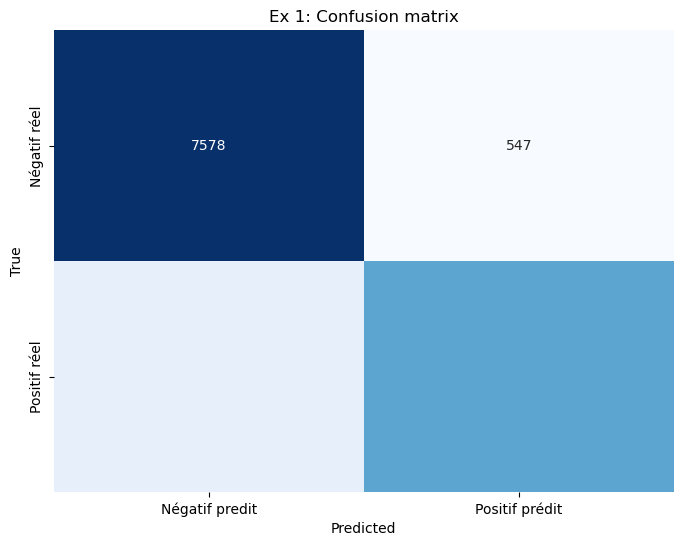

Mean F1 Score across all folds: 0.8386662823099837
Epoch 1/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5268 - val_loss: 0.4716
Epoch 2/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4542 - val_loss: 0.4283
Epoch 3/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4235 - val_loss: 0.3804
Epoch 4/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3930 - val_loss: 0.4082
Epoch 5/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3992 - val_loss: 0.4103
Epoch 6/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4172 - val_loss: 0.4388
Epoch 7/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4332 - val_loss: 0.4050
Epoch 8/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4004 - val_loss: 0.4328
Epoch 9/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4043 - val_loss: 0.4411
Epoch 10/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4012 - val_loss: 0.3980
Epoch 11/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3952 - val_los

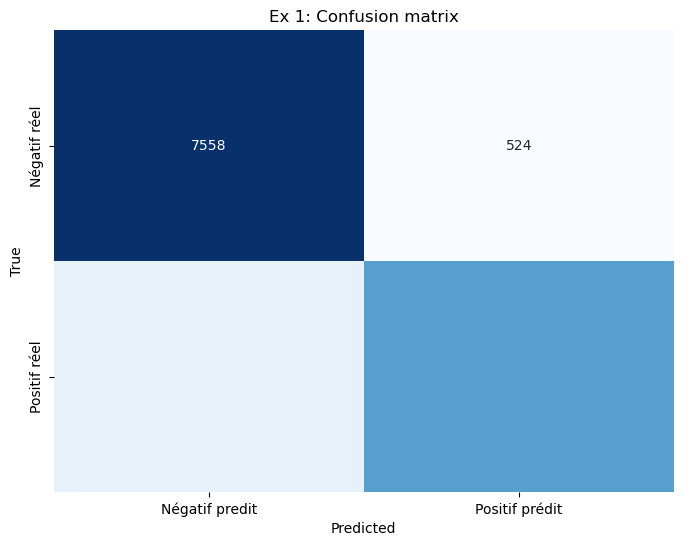

Mean F1 Score across all folds: 0.8433855777466135
Epoch 1/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5140 - val_loss: 0.4583
Epoch 2/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4667 - val_loss: 0.4127
Epoch 3/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4306 - val_loss: 0.4069
Epoch 4/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4264 - val_loss: 0.4328
Epoch 5/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3999 - val_loss: 0.4205
Epoch 6/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4263 - val_loss: 0.4469
Epoch 7/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4505 - val_loss: 0.4422
Epoch 8/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4346 - val_loss: 0.4327
Epoch 9/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4123 - val_loss: 0.4161
Epoch 10/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3998 - val_loss: 0.4224
Epoch 11/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4051 - val_los

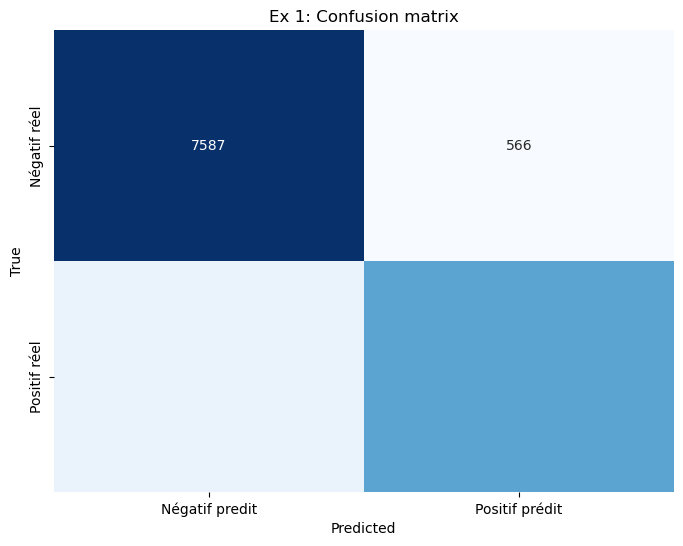

Mean F1 Score across all folds: 0.8443475553364932


In [17]:
import matplotlib.pyplot as pl
from sklearn.preprocessing import StandardScaler
import keras
from keras import layers
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score



def plot_confusion_matrix(confusion_matrix, title):
    # Plot confusion matrix
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Négatif predit", "Positif prédit"], yticklabels=["Négatif réel", "Positif réel"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()


history_list = []
trained_mlp = []
f1_scores = []

scaler = StandardScaler()
data_train_normalized = scaler.fit_transform(data_train.iloc[:,1:])
data_train_normalized #.shape

keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(data_train_normalized)):
  
  input_data = np.float32(data_train_normalized)[train_index]
  output_data = np.float32(data_train['state'].to_numpy())[train_index]

  input_data_val = np.float32(data_train_normalized)[test_index]
  output_data_val = np.float32(data_train['state'].to_numpy())[test_index]
    # We need to create a new model everytime otherwise fit will continue previous training
  mlp = create_model()

  history = mlp.fit(
      x = input_data,
      y = output_data,
      validation_data =(input_data_val, output_data_val),
      epochs=100
  )

  pred_validation_classes = mlp(input_data_val) > 0
  output_data_val_classes = output_data_val > 0

  cm = confusion_matrix(output_data_val_classes, pred_validation_classes)
  plot_confusion_matrix(cm, "Ex 1: Confusion matrix")

  f1 = f1_score(output_data_val_classes, pred_validation_classes)
  f1_scores.append(f1)

  history_list.append(history)
  trained_mlp.append(mlp)
  mean_f1_score = np.mean(f1_scores)
  print(f"Mean F1 Score across all folds: {mean_f1_score}")


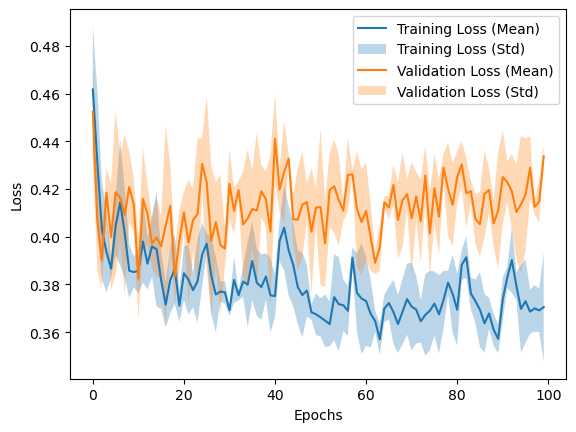

In [16]:
train_losses = np.array([history.history['loss'] for history in history_list])
val_losses = np.array([history.history['val_loss'] for history in history_list])

# Calculate mean and standard deviation for training and validation losses
mean_train_loss = np.mean(train_losses, axis=0)
std_train_loss = np.std(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)
std_val_loss = np.std(val_losses, axis=0)

# Plot mean and standard deviation for training loss
pl.plot(mean_train_loss, label='Training Loss (Mean)')
pl.fill_between(range(len(mean_train_loss)), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.3, label='Training Loss (Std)')

# Plot mean and standard deviation for validation loss
pl.plot(mean_val_loss, label='Validation Loss (Mean)')
pl.fill_between(range(len(mean_val_loss)), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.3, label='Validation Loss (Std)')

# Add labels and legend
pl.xlabel('Epochs')
pl.ylabel('Loss')
pl.legend()

# Display the plot
pl.show()

In [14]:
print(input_data)

[[-0.18343417 -0.32579064 -0.23051824 ...  0.25126752 -0.8361579
   0.3511537 ]
 [-0.14338918  3.6835458   1.3901839  ... -0.80473274 -0.64538926
  -0.8962209 ]
 [-0.4432612   0.9470617   2.0703652  ... -0.86411965  0.40952182
  -0.22842495]
 ...
 [-0.00800736  0.03031475 -0.27180138 ... -0.2164546  -0.07150355
  -1.2476485 ]
 [ 0.4009102  -0.46575662 -0.5250522  ...  0.7261015  -0.4796933
  -0.4147713 ]
 [-0.06242886 -0.08534876  0.37593293 ...  0.10716878 -0.0943504
   0.6374694 ]]


# Exercice 2

In [15]:
data_train_2 = mice_eeg_total.iloc[:, :26]
data_train_2.remplace("w", 0)
data_train_2.remplace("n", 1)
data_train_2.remplace("r", 2)

AttributeError: 'DataFrame' object has no attribute 'remplace'

In [22]:
def create_model_2():
  # 2 inputs
  # 2 hidden nodes
  # 1 output

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(3, activation="sigmoid"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(3, activation="softmax"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),  #0.01
      loss="mse",
  )

  return mlp

mlp_2 = create_model()
mlp_2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 8)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_list_3classes = []
trained_mlp_3classes = []


scaler = StandardScaler()
data_train_normalized = scaler.fit_transform(data_train.iloc[:,1:])
data_train_normalized #.shape


keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(data_train_normalized)):
  
  input_data = np.float32(data_train_normalized)[train_index]
  output_data = np.float32(data_train['state'].to_numpy())[train_index]

  input_data_val = np.float32(data_train_normalized)[test_index]
  output_data_val = np.float32(data_train['state'].to_numpy())[test_index]
    # We need to create a new model everytime otherwise fit will continue previous training
  mlp = create_model()

  history = mlp.fit(
      x = input_data,
      y = output_data,
      validation_data =(input_data_val, output_data_val),
      epochs=100
  )

  pred_validation_classes = mlp(input_data_val) > 0
  output_data_val_classes = output_data_val > 0

  cm = confusion_matrix(output_data_val_classes, pred_validation_classes)
  plot_confusion_matrix(cm, "Ex 1: Confusion matrix")

  history_list.append(history)
  trained_mlp.append(mlp)